In [1]:
# Loading all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler

## Dataset details
"This dataset contains the behavioural data of 11 different users freely utilising their personal computers" (Sanchez 2020). In this project, the data of only 1 user is taken into consideration. This data contains 10114 rows and 12048 columns, making it a large enough dataset to consider on it's own.  

## Data Preprocessing
In this section:
- <u>The dataset is loaded:</u>  
The dataset is in the form of a CSV file, titled as *User4_BEHACOM.csv*, and is loaded into a pandas DataFrame using the pandas library with a *latin1* encoding to handle special characters.
- <u>Unnecessary columns are removed:</u>  
    - *'current_app'* and *'penultimate_app'*:  
    These columns don't contain numeric values, which can cause issues in calculations later on.
    - *'USER'*:  
    This column indicates which user out of the 11 from the study the dataset belongs to. Since it's part of a larger dataset and is not needed for the analysis in this project, it is considered unnecessary.
    - *'timestamp'*:  
    This column denotes the timestamps that the entries were made in. This is not deemed as essential information, as it does not directly reflect a behavioural characteristic. An alternative approach would be to set this column as the index, which can help with analysing how fast the user makes decisions in comparison to a bot.
  


In [2]:
# Loading the dataset
User4 = pd.read_csv('User4_BEHACOM.csv', encoding='latin1')

In [3]:
# Removing unnecessary columns
B = User4.drop(columns=['current_app', 'penultimate_app','USER', 'timestamp'])
print(B)

       keystroke_counter  erase_keys_counter  erase_keys_percentage  \
0                     88                   4                   0.05   
1                      0                   0                   0.00   
2                     35                   0                   0.00   
3                      0                   0                   0.00   
4                      0                   0                   0.00   
...                  ...                 ...                    ...   
10109                  0                   0                   0.00   
10110                 21                   0                   0.00   
10111                241                  11                   0.05   
10112                188                  15                   0.08   
10113                  6                   0                   0.00   

       press_press_average_interval  press_press_stddev_interval  \
0                            416.23                       715.79   
1          

## Data Preparation
In this section:  
- <u>The training data is defined:</u>  
The variable *B_train* is assigned to the DataFrae *B*, making up the training set.  
- <u>The testing data is defined:</u>  
The variable *B_test* is also assigned to *B* and multiplied by a scalar *x*. This scalar represents the privacy preservation property of the project's output. For more information see *Chapter 3 Methods*.
- <u>Both variables are scaled in a MinMaxScaler Instance:</u>  
This will scale deatures to a range between 0 and 1. Both the training and testing sets scale their values between 0 and 1 with the testing being slightly larger due to the multiplication with scalar *x*. This is done in reference to [2].

In [4]:
# Defining training set
B_train = B         

# Random scalar
x = 50        

# Defining testing data
B_test = B * x      

In [ ]:
scaler = MinMaxScaler()

# The training data is fitted and transformed
B_train_scaled = scaler.fit_transform(B_train)      

# The testing data is transformed
B_test_scaled = scaler.transform(B_test)            

print(B_test_scaled)
print(B_train_scaled)

## One-class SVM and the decision boundary  
In this section:  
- <u> The one-class(OC) SVM model is created:</u>  
The oc SVM is initialised with the suitable hyperparameters. The kernel used is the *rbf*, the kernel coefficient, *gamma*, is on the automatic setting and *nu* is a small value. This is done with reference to [3].
- <u> The model is fitted to the training set</u>  
- <u> The decision function is used:</u>  
The decision function computes the distance of each point in the data from the decision boundary, with positive values denoting data within the boundary and negative values, the points outside the boundary. This is done in reference to [3]]. With this decision function, the minimum and maximum values are derived.
- <u> The new minimum value is derived:</u>  
As the minimum value turns out to be negative, this indicates an outlier. Using a *for loop* the next value after the minimum that is of a positive sign becomes the new minimum value of the output of the decision function.

# Visualisation
With the use of the seaborn library and in reference to [4], the following are visualised:  
- The outputs of the decision functions
- The negative minimum point and the new minimum point as dots.



In [8]:
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)

In [9]:
model.fit(B_train_scaled)

OneClassSVM(nu=0.1)

In [10]:
decisionf = model.decision_function(B_train_scaled)

In [11]:
# Minimum value
minvalue = decisionf.min()                               
# Maximum value       
maxvalue = decisionf.max()                                     

print(f'The minimum and maximum values are', '[', minvalue, maxvalue, ']')

The minimum and maximum values are [ -20.15023390219465 52.70627165648634 ]


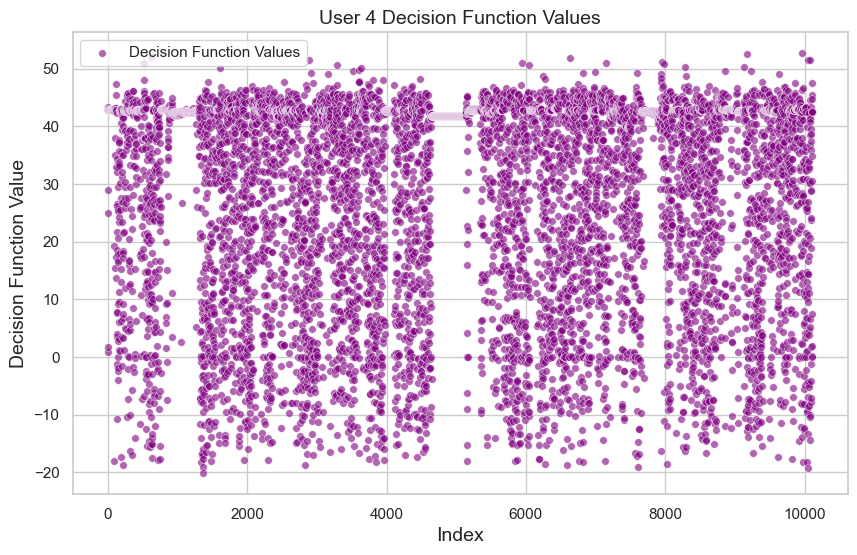

In [12]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),                
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

plt.title('User 4 Decision Function Values', fontsize=14)      
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()

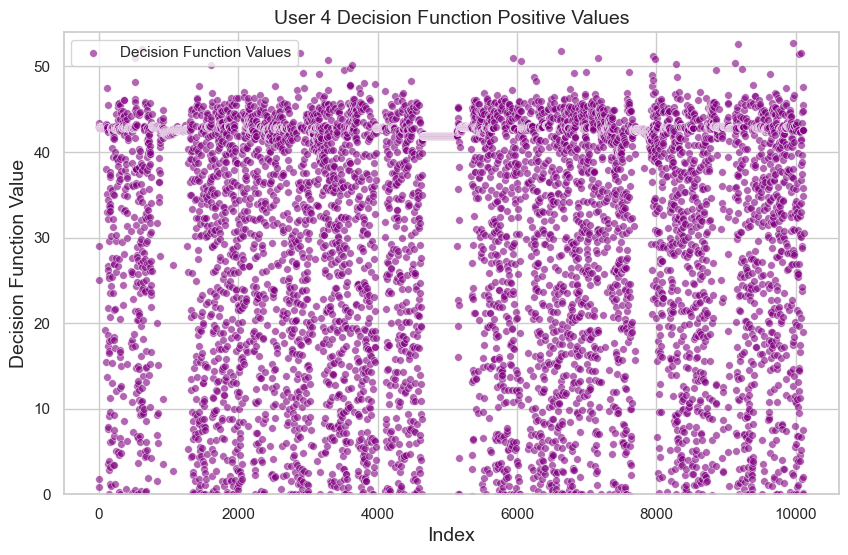

In [13]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),                
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

plt.title('User 4 Decision Function Positive Values', fontsize=14)     
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.ylim(0, 54)
plt.grid(True)
plt.legend()

plt.show()

The idea behind the use of the decision function is to define the minimum and maximum values of the decision function. This is done so that there is a reference point to compare the distances between the training and testing sets.  
Hence, the minimum and maximum values are revealed. 

The minimum value derived from the decision function is negative, suggesting the presence of a potential outlier, which is undesirable. To address this, the first positive point encountered after this minimum becomes the new minimum value of the boundary.

In [14]:
# Creating new variable newmin
newmin = None                                   

# The decision values are sorted in ascending order and iterated over each element.
for value in sorted(decisionf):               
    # Finding the next positive value after the minimum  
    if value > minvalue and value > 0:         
        # Assigns the new minimum to the previously created variable
        newmin = value                          
        break
print(newmin)

9.203778539301766e-07


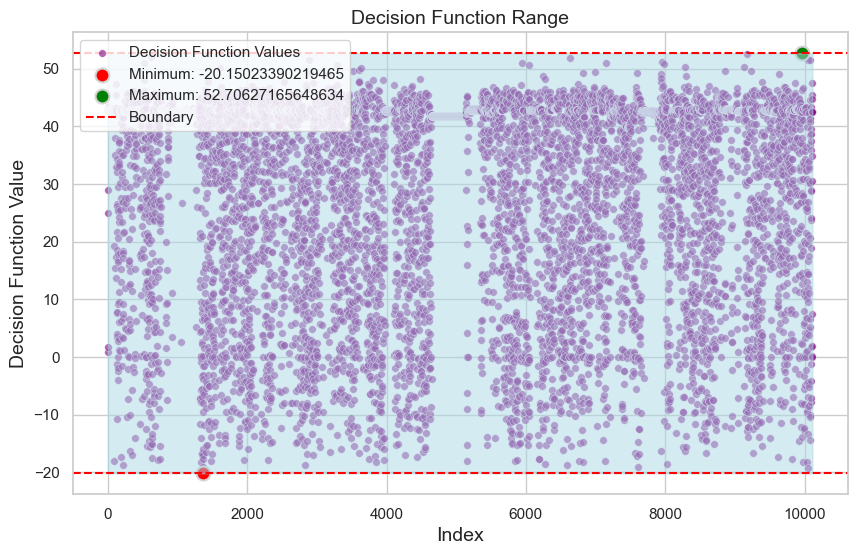

In [15]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),                
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

# Index of the minimum value
minindex = np.argmin(decisionf)        

# Index of maximum value
maxindex = np.argmax(decisionf)                        

# Plotting the minimum value
sns.scatterplot(x=[minindex],                          
                y=[minvalue], 
                color='red', 
                s=100, 
                edgecolor='lightgrey', 
                linewidth=1.5, 
                label=f'Minimum: {minvalue}')

# Plotting the maximum value
sns.scatterplot(x=[maxindex],                          
                y=[maxvalue], 
                color='green', 
                s=100, 
                edgecolor='lightgrey', 
                linewidth=1.5, 
                label=f'Maximum: {maxvalue}')

# Plotting horizontal lines at the minimum and maximum
plt.axhline(y=minvalue,                                
            color='red',                              
            linestyle='--', 
            label='Boundary')

plt.axhline(y=maxvalue, 
            color='red', 
            linestyle='--')

# Adding shading between the minimum and maximum
plt.fill_between(range(len(decisionf)),                
                 minvalue,
                 maxvalue,
                 color='lightblue',
                 alpha=0.5)

plt.title('Decision Function Range', fontsize=14)      
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend(loc='upper left')

plt.show()

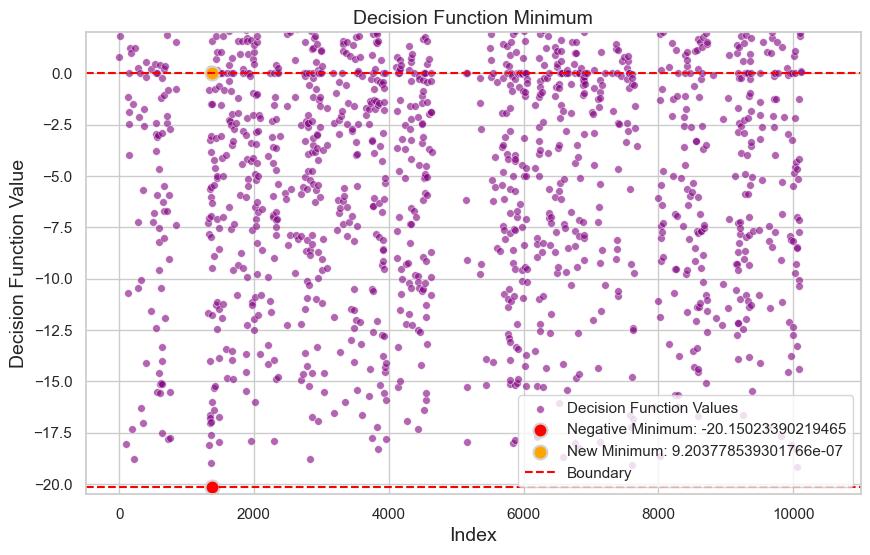

In [16]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),                
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

# Index of the minimum value
min_index = np.argmin(decisionf)                        

# Plotting the negative minimum value
sns.scatterplot(x=[min_index],                          
                y=[minvalue], 
                color='red', 
                s=100, 
                edgecolor='lightgrey', 
                linewidth=1.5, 
                label=f'Negative Minimum: {minvalue}')

# Plotting the new minimum value
sns.scatterplot(x=[min_index],                          
                y=[newmin], 
                color='orange', 
                s=100, 
                edgecolor='lightgrey', 
                linewidth=1.5, 
                label=f'New Minimum: {newmin}')

 # Plotting horizontal lines at the negative and new minimum values
plt.axhline(y=minvalue,                                
            color='red',                          
            linestyle='--', 
            label='Boundary')

plt.axhline(y=newmin, 
            color='red', 
            linestyle='--')

 # Set the limit close to the values
plt.ylim(-20.5, 2)                             
plt.xlim(-500, 11000)

plt.title('Decision Function Minimum', fontsize=14)     
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()


# Boundary limits
To counteract for the multiplication of the testing set with the scalar *x*, the boundary limits are also multplied by *x*, ensuring accuracy.

In [20]:
bmin = float(newmin * x)
bmax = float(maxvalue * x)
print(f'The new minimum is', {bmin})
print(f'Therefore, the range that defines human web browsing activity (after multiplication with x) is:', [bmin, bmax])

The new minimum is {0.0004601889269650883}
Therefore, the range that defines human web browsing activity (after multiplication with x) is: [0.0004601889269650883, 26353.13582824317]


## Comparing distances  
To determine if the new input data defines human browsing activity, it is compared to the training data. The new input is denoted as the testing data. The comparison is done using a distance metric, this project explores Euclidean distance.
This section explores:
- <u> The transposition of the training and testing data:</u>  
Both sets are transposed as the focus is comparing the features. The distance metrics compare over rows hence, by transposing the sets, the similarity metrics are comparing the features.  
- <u> The calculation of the euclidean distance:</u>  
The *cdist* function is used to compare the distances between all pairs of rows from the two sets. This is in reference to [5].  
- <u> Whether the euclidean distances are within the boundary range:</u>  
A new variable *inrange*, is a boolean array [6] that checks whether the euclidean distances are within the boundary range. This means that the distances are greater or equal than the minimum and smaller or equal than the maximum.
- <u> The final classification of the testing data:</u>  
The distances within the range are counted in and labelled as 0 and 1 as per the requirements of the project. The counts are then compared to determine the majority, meaning that if there are more "True" distances than "False" ones, the testing data, hence, the client (as per assumption 1 in the report) is classified as 1 or 0.

In [55]:
# The transpose of the training data
B_trtranspose = B_train_scaled.T 

# The transpose of the testing data
B_tetranspose = B_test_scaled.T            

In [56]:
# Calculating the Euclidean distance
y_eucl = cdist(B_trtranspose, B_tetranspose, metric='euclidean')        

print("The Euclidean distance of the two sets is:\n", y_eucl)

The Euclidean distance of the two sets is:
 [[10343.9530147   7149.98407806  3149.32491808 ...  1912.38382766
    662.94271264  1121.50447836]
 [10351.55510224  7154.62267141  3152.14252932 ...  1915.88493856
    663.89443862  1121.9327399 ]
 [10360.67317136  7164.41783616  3156.10300906 ...  1917.80610174
    664.53690033  1122.23109376]
 ...
 [10363.2624295   7167.8581639   3161.11932675 ...  1916.11570987
    664.6577877   1122.29102994]
 [10321.68890257  7133.24114397  3124.28677087 ...  1880.5736694
    650.11070881  1109.98785237]
 [10325.76090919  7136.60959803  3127.85453015 ...  1884.22950112
    651.7172821   1109.05221547]]


In [57]:
# Printing the number of values in the DataFrame
print(f"Number of values in y_eucl: {len(y_eucl)}")


Number of values in y_eucl: 12047


In [58]:
# Checking if the distances are larger than the range's minimum and smaller than the maximum
inrange = (y_eucl >= (bmin)) & (y_eucl <= (bmax))  

# View if they are within range or not
print('Checking whether distances are within the range:', inrange)              

Checking whether distances are within the range: [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [59]:
# Summing up the all the distances in the range
onecount = np.sum(inrange)           

# Summing up all the distances outside of the range using bitwise NOT operator '~'                               
zerocount = np.sum(~inrange)                                           

# Calculating the majority
if onecount > zerocount:                                                  
    majority = "1"
else:
    majority = "0"

print(f"Number of 1s: {onecount}")                                  
print(f"Number of 0s: {zerocount}")
print(f"The model determines that {majority} is the majority.")

Number of 1s: 115318609
Number of 0s: 29811600
The model determines that 1 is the majority.


## Conclusion
Therefore, as per the assumption, the web client with the testing data is labelled as a human.

To summarise, the OC SVM is trained on a dataset pertaining to human users and subsequently tested on the same dataset multiplied by a scalar *x*, intended to represent the privacy-preserving attribute of the ZKML framework. Using the training data in the decision function, the minimum and maximum limits are established, which are then adjusted by multiplied by *x* to account for the inflation in the testing set. This process defines the boundaries-range of the model. The features of both sets, portrayed as rows by the method of transposition, are compared using the Euclidean distance, and assessed as to whether they fall within the range defined previously. The majority count then classifies whether the web client is a human or not. Due to the dataset containing one class that defines human behaviour, the model never takes bot data as an input and therefore cannot definitively classify the client as a bot.

__________________________________________________________________________________________________________

## References  
[1] Sanchez, P. M. S. (2020) BEHACOM, Mendeley Data. Mendeley Data. Available at: https://data.mendeley.com/datasets/cg4br62535/2 (Accessed: 26 September 2024).  


[2] scikit-learn.org (2019). MinMaxScaler. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html [Accessed: 26 September 2024]  

[3] scikit-learn.org. (2024). sklearn.svm.OneClassSVM — scikit-learn 0.24.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html [Accessed 26 Sep. 2024].

[4] Pydata.org. (2024). seaborn.scatterplot — seaborn 0.13.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.scatterplot.html [Accessed 27 Sep. 2024].

[5] Scipy.org. (2024). cdist — SciPy v1.14.1 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html [Accessed 27 Sep. 2024].

[6] Buffalo.edu. (2017). Boolean numpy arrays — MTH 337. [online] Available at: https://www.math.buffalo.edu/~badzioch/MTH337/PT/PT-boolean_numpy_arrays/PT-boolean_numpy_arrays.html#:~:text=A%20boolean%20array%20is%20a,numpy%20as%20np%20a%20%3D%20np. [Accessed 27 Sep. 2024].



‌